<a href="https://colab.research.google.com/github/gedeon129/Data-201/blob/main/teamwork_data_201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target Variable:
We are predicting the Electric Vehicle (EV) Total.

Questions:

How does the total number of vehicles (or non-electric vehicles) influence the number of electric vehicles?

Can we use simple information about vehicles in a county to predict how many EVs there are?

In [7]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load the data
df = pd.read_csv('/content/Electric_Vehicle_Population_Size_History_By_County.csv')

# 3. Display basic info
print(df.info())
print(df.head())

# 4. Check for missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26486 entries, 0 to 26485
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      26486 non-null  object 
 1   County                                    26387 non-null  object 
 2   State                                     26387 non-null  object 
 3   Vehicle Primary Use                       26486 non-null  object 
 4   Battery Electric Vehicles (BEVs)          26486 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  26486 non-null  int64  
 6   Electric Vehicle (EV) Total               26486 non-null  int64  
 7   Non-Electric Vehicle Total                26486 non-null  int64  
 8   Total Vehicles                            26486 non-null  int64  
 9   Percent Electric Vehicles                 26486 non-null  float64
dtypes: float64(1), int64(5), object(4)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Drop missing values in important columns
df = df.dropna(subset=['Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles'])

# Define Features (X) and Target (y)
X = df[['Non-Electric Vehicle Total', 'Total Vehicles']]
y = df['Electric Vehicle (EV) Total']


                  Scatterplot: Electric Vehicles vs EV Total

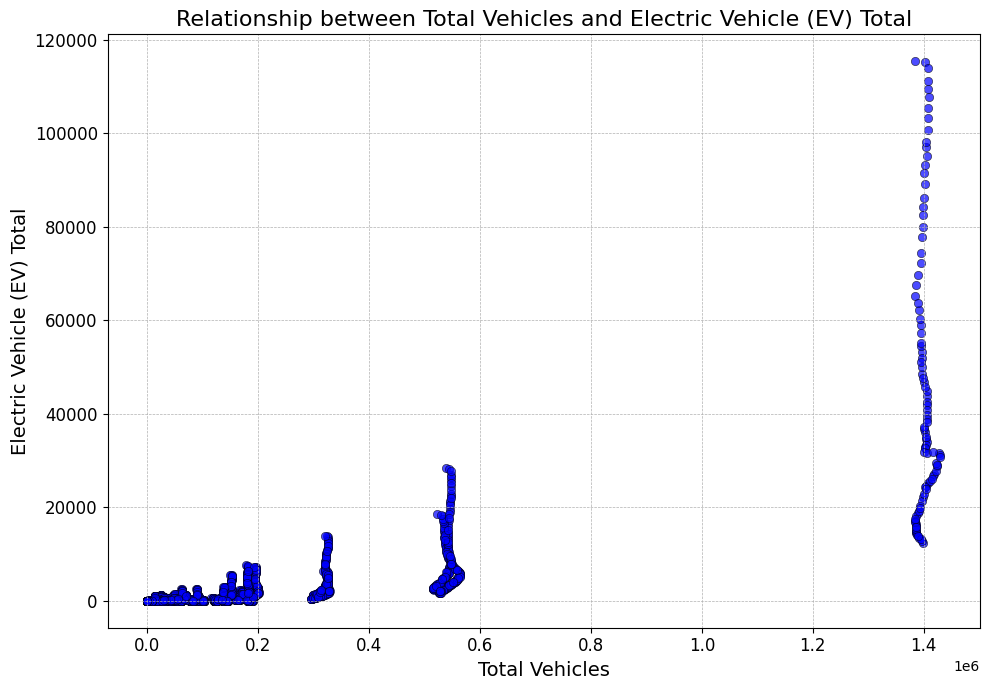

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total Vehicles', y='Electric Vehicle (EV) Total', data=df, color='blue', edgecolor='black', alpha=0.7)
plt.title('Relationship between Total Vehicles and Electric Vehicle (EV) Total', fontsize=16)
plt.xlabel('Total Vehicles', fontsize=14)
plt.ylabel('Electric Vehicle (EV) Total', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


                    Scatterplot: Non-Electric Vehicles vs EV Total

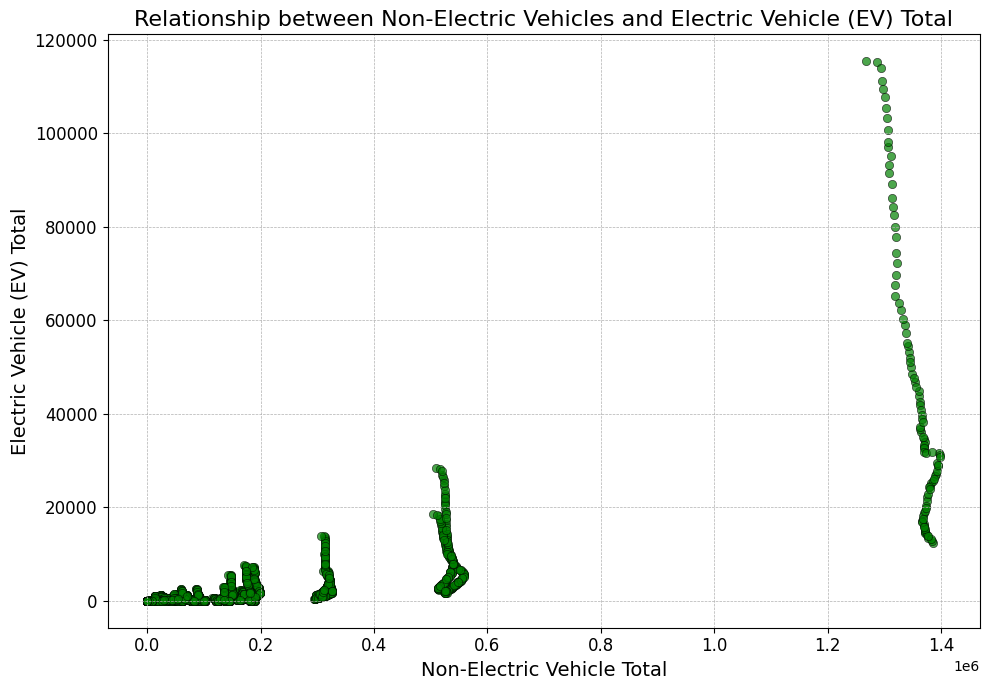

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Non-Electric Vehicle Total', y='Electric Vehicle (EV) Total', data=df, color='green', edgecolor='black', alpha=0.7)
plt.title('Relationship between Non-Electric Vehicles and Electric Vehicle (EV) Total', fontsize=16)
plt.xlabel('Non-Electric Vehicle Total', fontsize=14)
plt.ylabel('Electric Vehicle (EV) Total', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Print model metrics
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("\nModel Performance Metrics:")
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score:", metrics.r2_score(y_test, y_pred))


Intercept: 9.833911462919787e-12
Coefficients: [-1.  1.]

Model Performance Metrics:
Mean Absolute Error (MAE): 1.6031871582159103e-11
Mean Squared Error (MSE): 2.513818741230377e-21
Root Mean Squared Error (RMSE): 5.013799698063712e-11
R^2 Score: 1.0




                     Histogram of Residuals

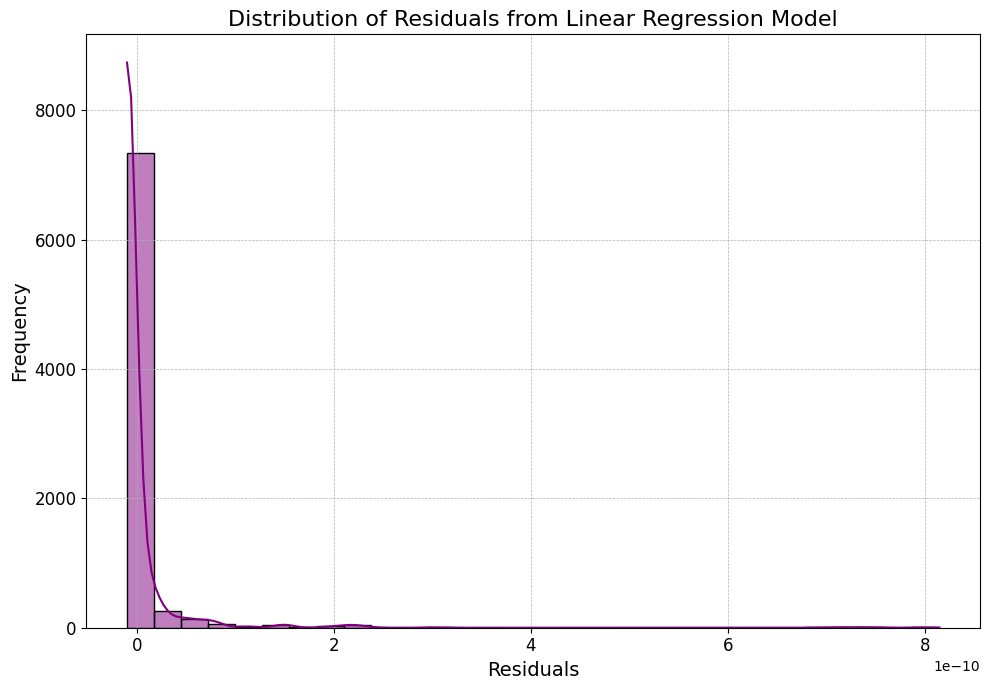

In [26]:

plt.figure(figsize=(10,7))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals from Linear Regression Model', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


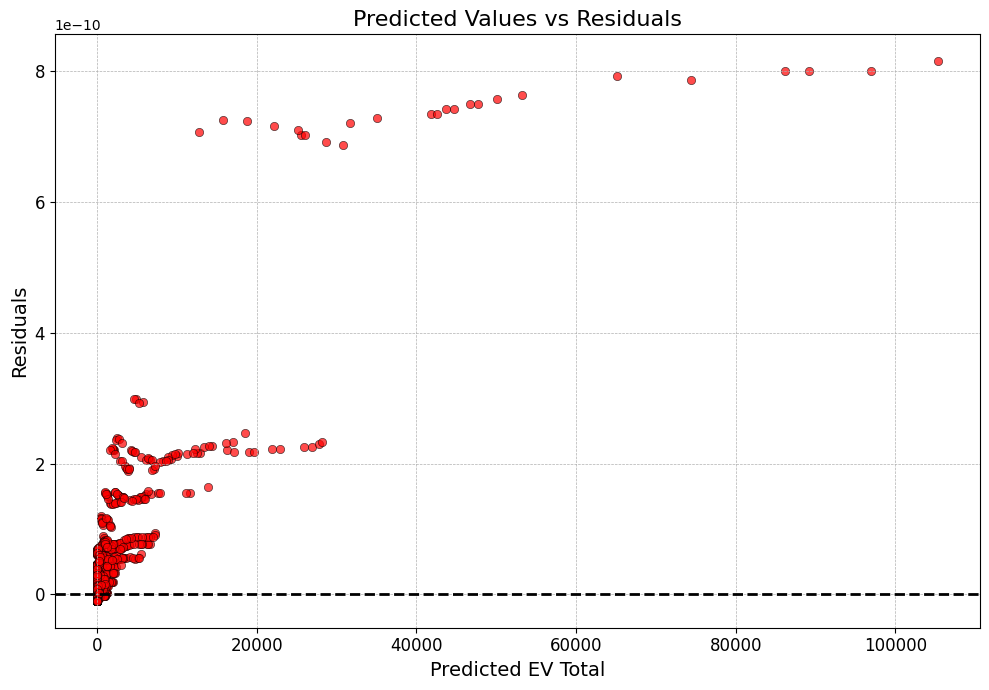

In [29]:
# Scatterplot of Predicted vs Residuals
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_pred, y=residuals, color='red', edgecolor='black', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Predicted Values vs Residuals', fontsize=16)
plt.xlabel('Predicted EV Total', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
